In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append("../")

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px


# Para el modelado de los datos
# -----------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import math
# Importar nuestro archivo de soporte
# -----------------------------------------------------------------------
from src import soporte_clustering as sc

# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../datos/Global_Superstore.csv', encoding='ISO-8859-1')
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [3]:
# instanciamos la clase de Exploración de datos antes de aplicar el algoritmo
preprocesar = sc.Exploracion(df)

# llamamos al método de exploración de datos
preprocesar.explorar_datos()

5 registros aleatorios:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
35553,28420,IN-2013-11420,06-10-2013,11-10-2013,Standard Class,SF-20200,Sarah Foster,Consumer,Ballarat,Victoria,...,OFF-LA-10004894,Office Supplies,Labels,"Hon Shipping Labels, Alphabetical",30.2130,3,0.10,11.6730,3.42,High
29077,12442,ES-2011-3041134,07-10-2011,08-10-2011,First Class,RC-19960,Ryan Crowe,Consumer,Stockton-on-Tees,England,...,OFF-AR-10001482,Office Supplies,Art,"Stanley Markers, Easy-Erase",22.4700,1,0.00,0.0000,5.93,High
45064,28861,ID-2014-70640,12-08-2014,16-08-2014,Standard Class,HL-15040,Hunter Lopez,Consumer,Caloocan,National Capital,...,OFF-BI-10003806,Office Supplies,Binders,"Avery Index Tab, Clear",16.1415,3,0.15,6.2415,1.22,Medium
19853,42087,PL-2012-8330,18-06-2012,23-06-2012,Standard Class,JF-5190,Jamie Frazer,Consumer,Warsaw,Masovia,...,OFF-SME-10000973,Office Supplies,Storage,"Smead Folders, Industrial",143.7600,8,0.00,32.8800,12.65,Medium
4976,23226,IN-2012-52111,30-11-2012,30-11-2012,Same Day,JH-16180,Justin Hirsh,Consumer,Nizamabad,Telangana,...,TEC-AC-10003734,Technology,Accessories,"Memorex Numeric Keypad, Erganomic",280.2600,6,0.00,128.8800,66.98,Critical




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 

,count,mean,std,min,25%,50%,75%,max
Row ID,51290.0,25645.500000,14806.291990,1.000,12823.250000,25645.500,38467.7500,51290.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.000000,56430.500,90008.0000,99301.000
Sales,51290.0,246.490581,487.565361,0.444,30.758625,85.053,251.0532,22638.480
Quantity,51290.0,3.476545,2.278766,1.000,2.000000,3.000,5.0000,14.000
Discount,51290.0,0.142908,0.212280,0.000,0.000000,0.000,0.2000,0.850
Profit,51290.0,28.610982,174.340972,-6599.978,0.000000,9.240,36.8100,8399.976
Shipping Cost,51290.0,26.375915,57.296804,0.000,2.610000,7.790,24.4500,933.570




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
Order ID,51290,25035,CA-2014-100111,14
Order Date,51290,1430,18-06-2014,135
Ship Date,51290,1464,22-11-2014,130
Ship Mode,51290,4,Standard Class,30775
Customer ID,51290,1590,PO-18850,97
Customer Name,51290,795,Muhammed Yedwab,108
Segment,51290,3,Consumer,26518
City,51290,3636,New York City,915
State,51290,1094,California,2001
Country,51290,147,United States,9994




Número de valores nulos por columna:
Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64


Distribución de valores categóricos:

Columna: Order ID
Order ID
CA-2014-100111     14
IN-2012-41261      13
TO-2014-9950       13
IN-2013-42311      13
NI-2014-8880       13
                   ..
ES-2013-1579342     1
MX-2012-134460      1
IN-2013-34366       1
US-2011-152723      1
CA-2012-162544      1
Name: count, Length: 25035, dtype: int64

Columna: Order Date
O

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
Row ID,1.000000,0.009671,-0.043889,-0.173483,0.087594,-0.019037,-0.039078
Postal Code,0.009671,1.000000,-0.023854,0.012761,0.058443,-0.029961,-0.025449
Sales,-0.043889,-0.023854,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,-0.173483,0.012761,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,0.087594,0.058443,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,-0.019037,-0.029961,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,-0.039078,-0.025449,0.768073,0.272649,-0.079056,0.354441,1.000000


In [4]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


In [5]:
#row ID es un valor unico por lo que vamos a borrar la columna
#Postal code porcentaje alto de nulos, tenemos otro valores que pueden identificar esto 
df.drop(columns=['Row ID','Postal Code','Customer ID','Customer Name','Ship Date','Order Date','Order ID'],inplace=True)


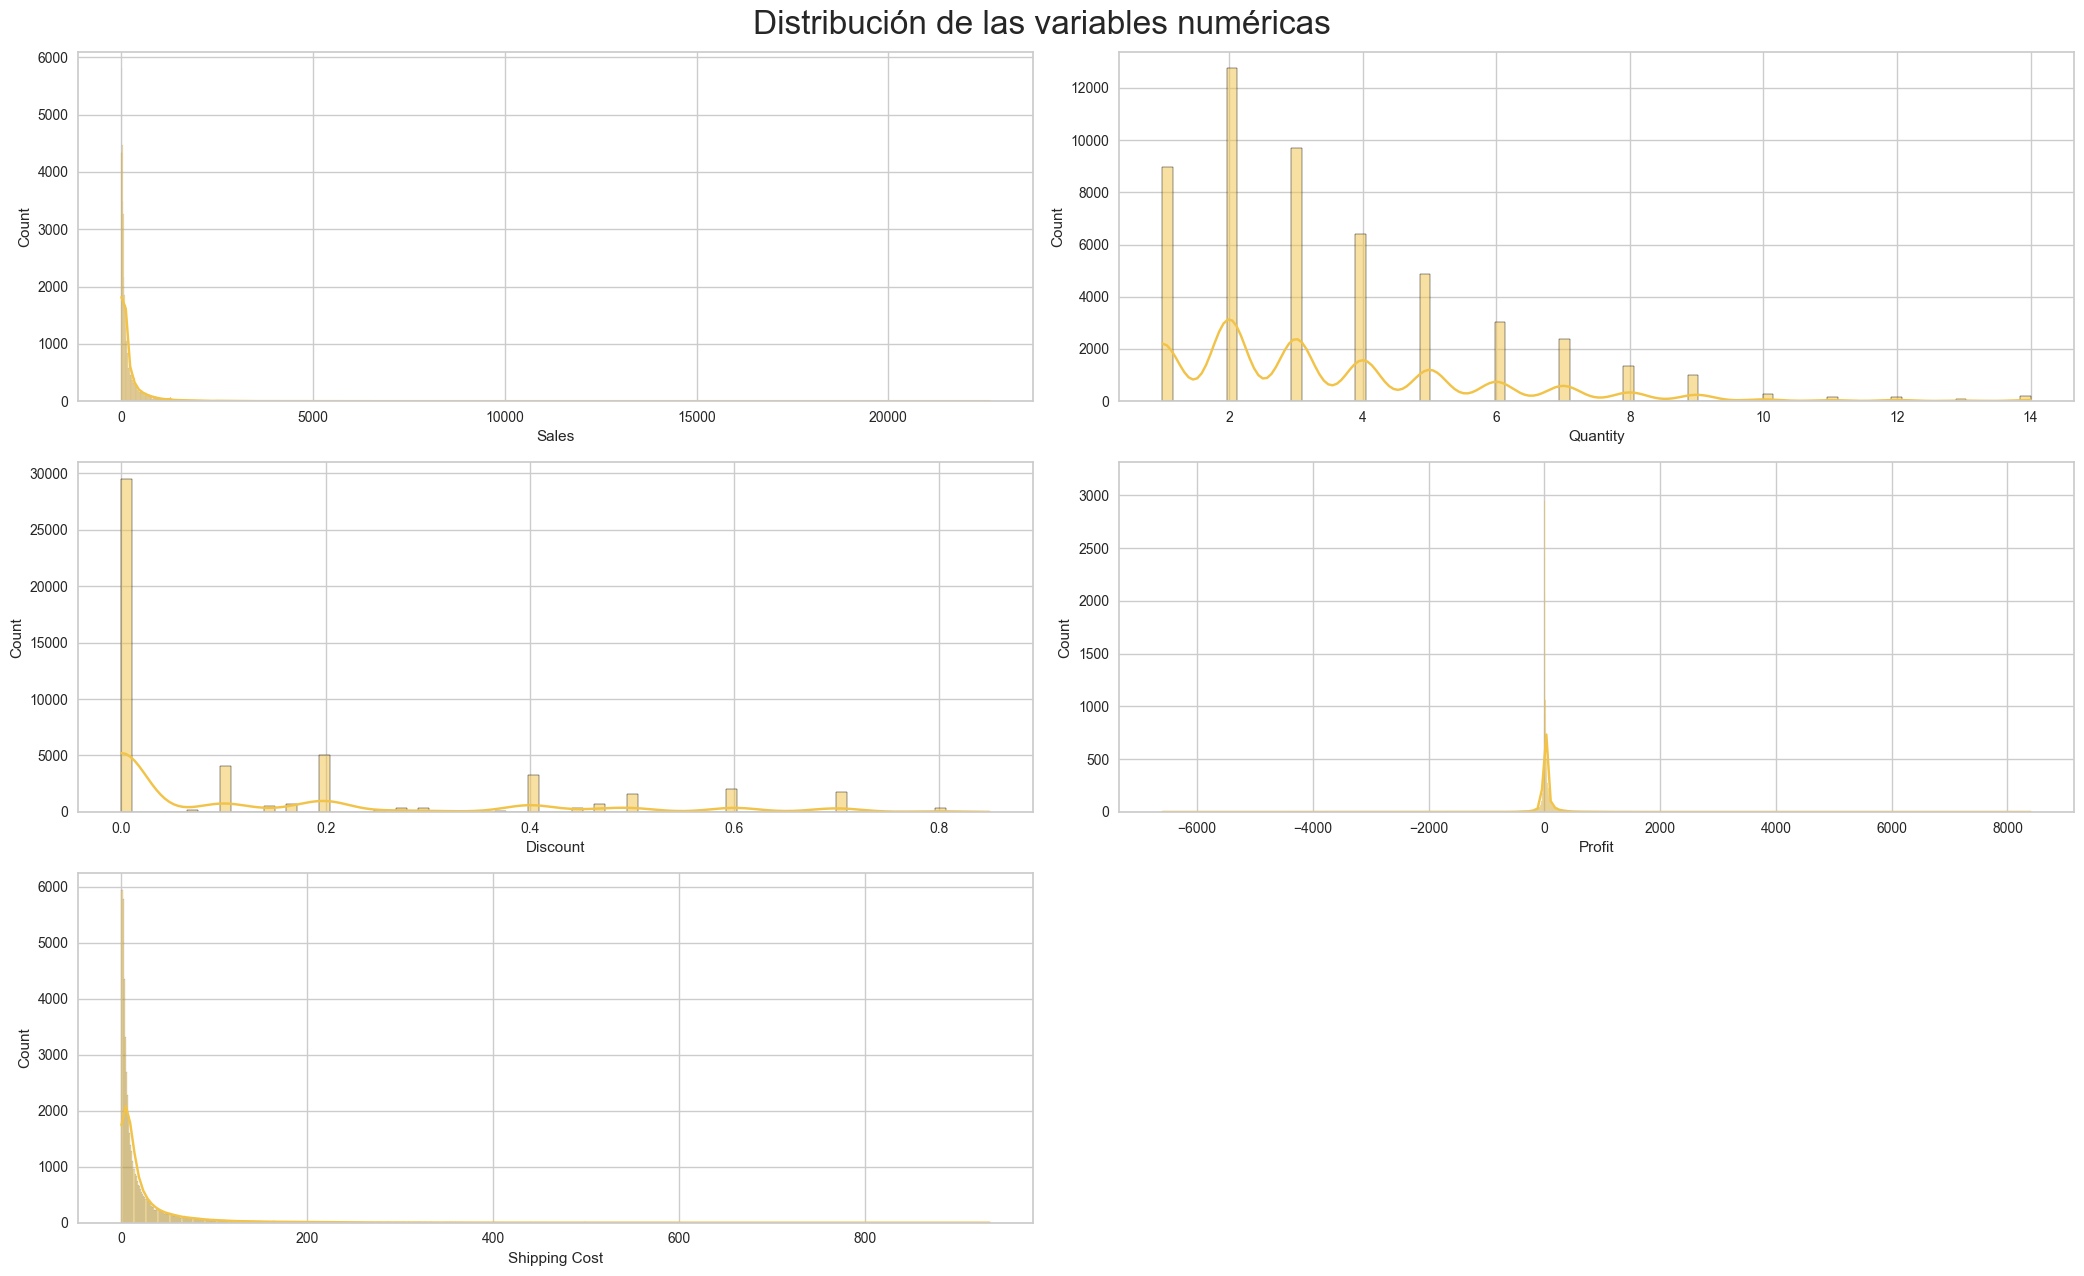

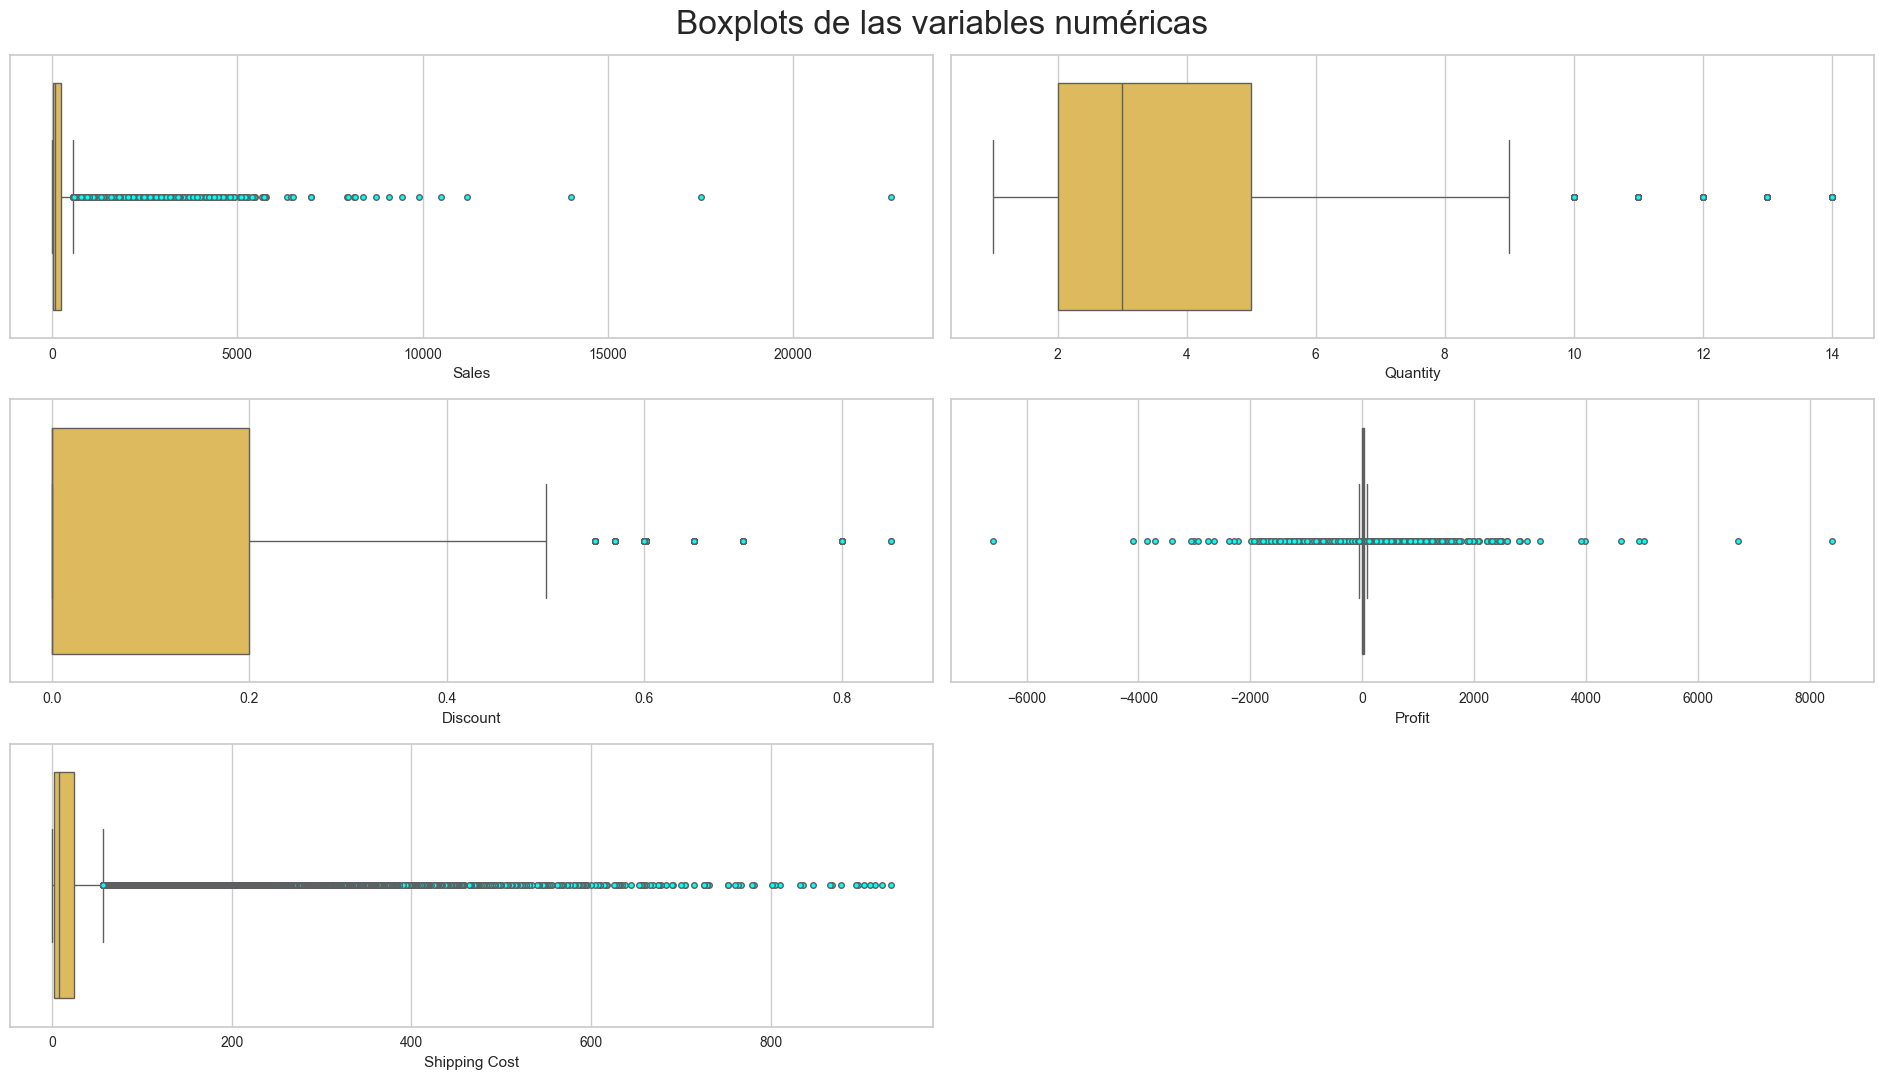

In [6]:
preprocesar.visualizar_numericas()

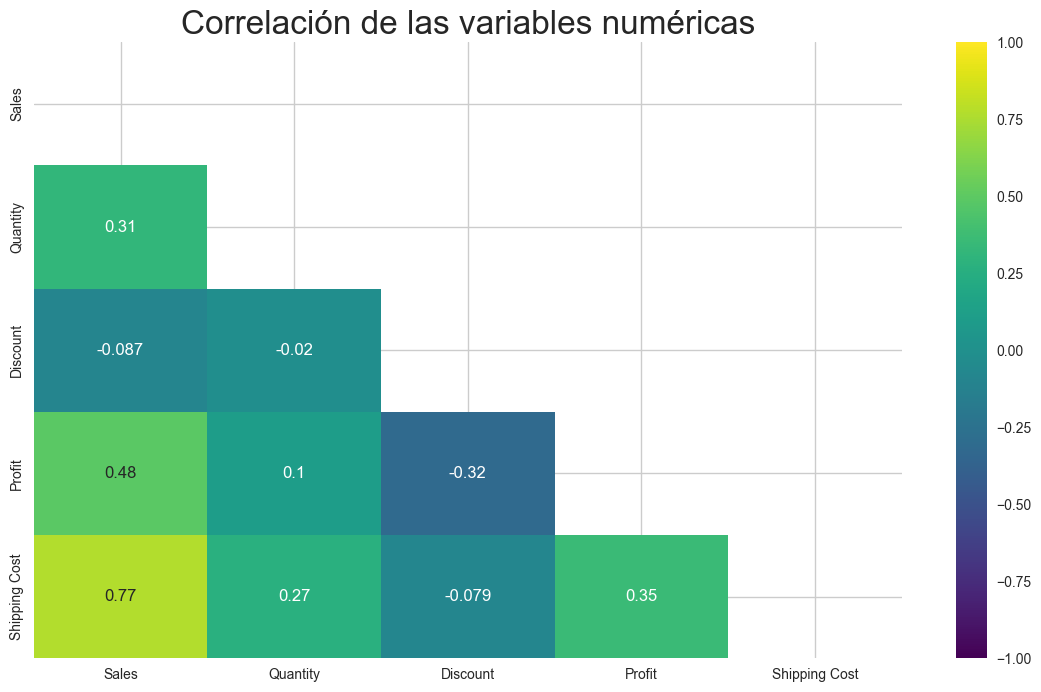

In [7]:
# evaluamos la correlación entre las variables numéricas
preprocesar.correlacion()

In [8]:
# para nuestro modelo, no usaremos la columna de 'country' por lo que vamos a ponerla en el index para que no nos moleste
# haremos una copia del DataFrame original para poder trabajar con el más adelante

# instanciamos la clase de Preprocesado de datos antes de aplicar el algoritmo
preprocesar = sc.Preprocesado(df)

# estandarizamos los datos
df = preprocesar.estandarizar()

# chequeamos que se estandarizó correctamente
df.head()

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,10.098283,1.333333,0.0,20.454890,42.389194,Critical
1,Second Class,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",16.452253,2.000000,0.5,-8.095762,41.934066,Critical
2,First Class,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",23.105962,2.000000,0.5,24.741402,41.561355,Medium
3,First Class,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",12.744104,0.666667,0.5,-2.873676,41.317308,Medium
4,Same Day,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",12.473784,1.666667,0.0,8.211899,40.991300,Critical


In [9]:
preprocesar.codificar()

,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,10.098283,1.333333,0.0,20.454890,42.389194,0.076662
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,16.452253,2.000000,0.5,-8.095762,41.934066,0.076662
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,23.105962,2.000000,0.5,24.741402,41.561355,0.573855
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,12.744104,0.666667,0.5,-2.873676,41.317308,0.573855
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,12.473784,1.666667,0.0,8.211899,40.991300,0.076662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,0.052661,0.300819,0.000078,0.000117,0.004874,0.214506,0.045584,0.000097,0.609729,0.047183,0.000351,-0.090574,0.666667,0.0,-0.128769,-0.356227,0.573855
51286,0.600019,0.517021,0.007350,0.019205,0.194853,0.194853,0.216748,0.000078,0.609729,0.034217,0.000078,-0.384072,-0.666667,4.0,-0.281174,-0.356227,0.573855
51287,0.052661,0.182160,0.000175,0.039013,0.194853,0.194853,0.062449,0.000156,0.609729,0.047475,0.000156,-0.282045,0.000000,0.0,0.054083,-0.356227,0.302223
51288,0.600019,0.182160,0.000175,0.007974,0.031176,0.200702,0.129557,0.000175,0.609729,0.119945,0.000702,-0.325078,-0.333333,0.0,-0.185819,-0.356685,0.573855


In [10]:
df.to_csv('../datos/datos_prepro.csv')

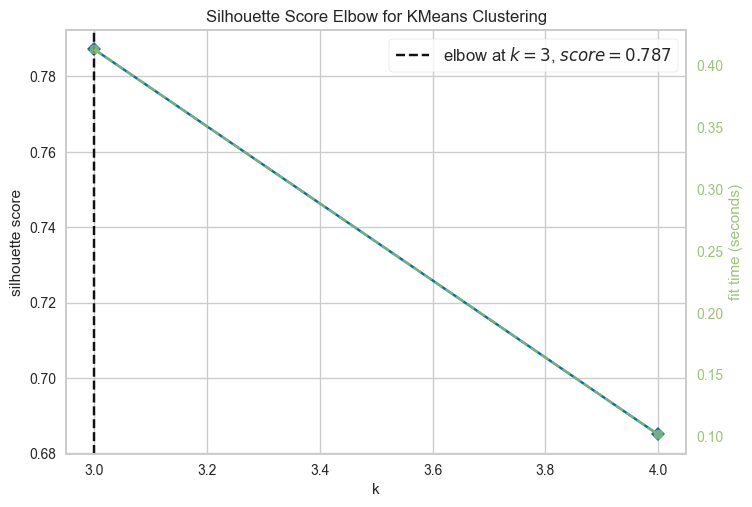

In [11]:
# instanciamos la clase de clustering
modelos = sc.Clustering(df)

# sacamos el número de clusters óptimos para hacer el Kmeans 
modelos.sacar_clusters_kmeans()

In [12]:
1# aplicamos el modelo de Kmeans al dataframe 
df, labels  = modelos.modelo_kmeans(df, 3)

# mostramos el DataFrame
df.head()


,Ship Mode,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,clusters_kmeans
0,0.052661,0.517021,0.017840,0.021993,0.194853,0.194853,0.055527,0.000195,0.197719,0.059953,0.000195,10.098283,1.333333,0.0,20.454890,42.389194,0.076662,1
1,0.200994,0.300819,0.002554,0.015227,0.055313,0.214506,0.067986,0.000195,0.192552,0.066953,0.000487,16.452253,2.000000,0.5,-8.095762,41.934066,0.076662,1
2,0.146325,0.517021,0.003470,0.013979,0.055313,0.214506,0.067986,0.000195,0.197719,0.065451,0.000468,23.105962,2.000000,0.5,24.741402,41.561355,0.573855,1
3,0.146325,0.182160,0.004231,0.004231,0.040261,0.194970,0.216748,0.000078,0.197719,0.065451,0.000448,12.744104,0.666667,0.5,-2.873676,41.317308,0.573855,1
4,0.052661,0.517021,0.001657,0.001657,0.002184,0.089433,0.089433,0.000019,0.197719,0.043342,0.000234,12.473784,1.666667,0.0,8.211899,40.991300,0.076662,1


In [13]:
modelos.calcular_metricas(labels=labels)

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.789026,0.709884,48687


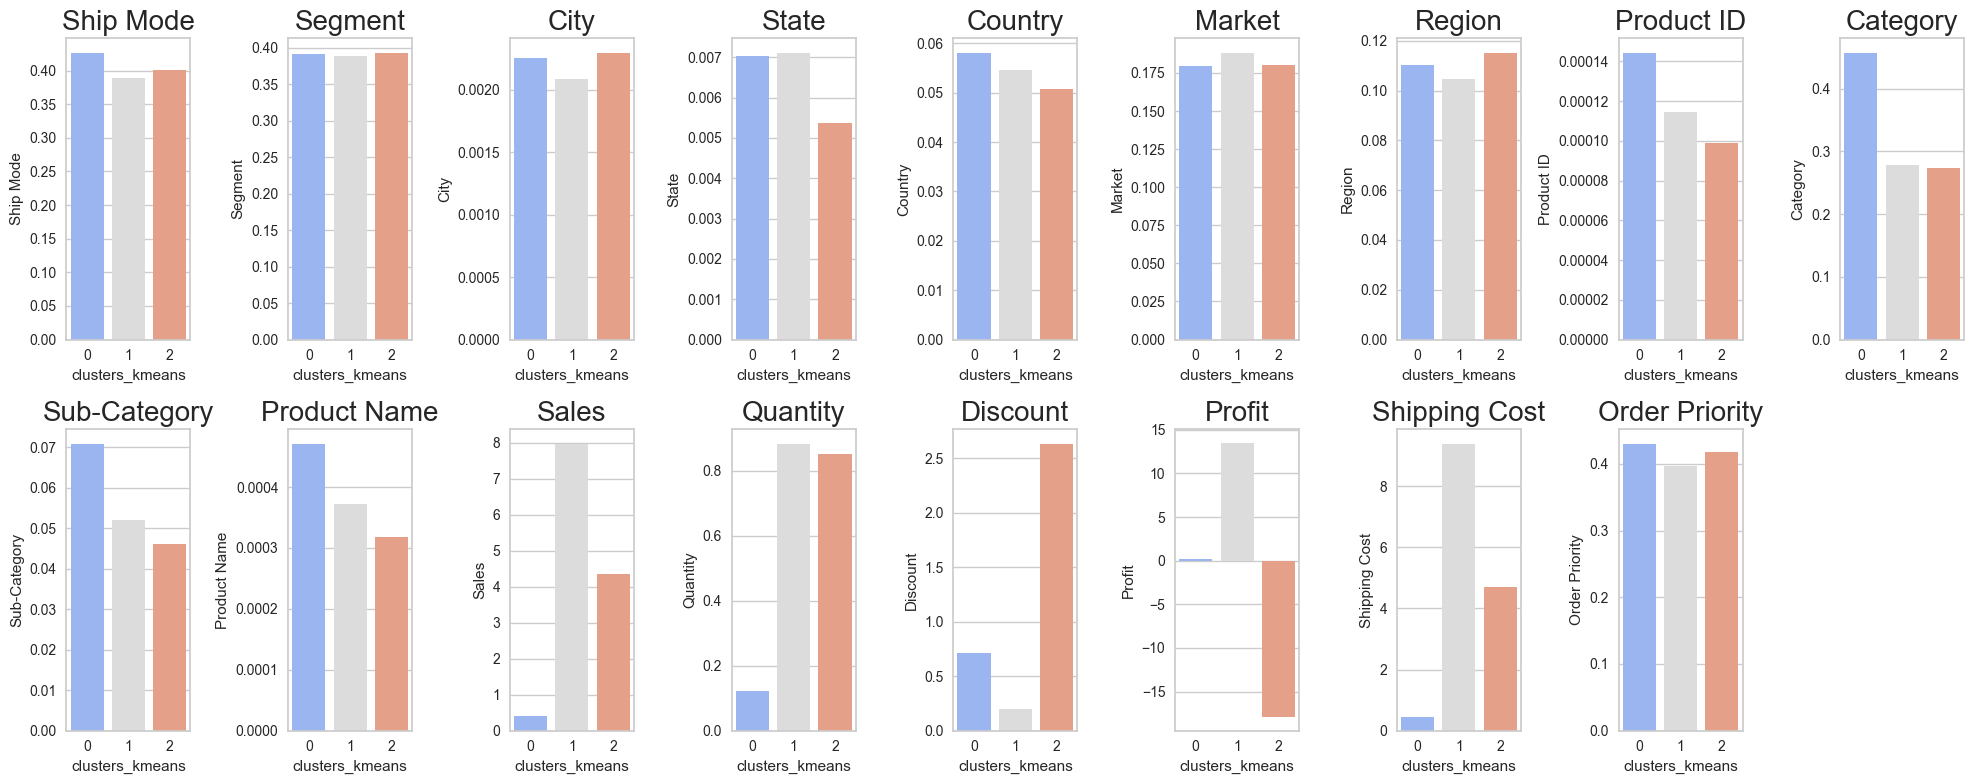

In [14]:
# Eliminar la columna "clusters_kmeans" para el plot
columnas_plot = df.columns.drop("clusters_kmeans")

# Crear subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(columnas_plot) / 2), figsize=(20, 8))
axes = axes.flat

for indice, columna in enumerate(columnas_plot):
    df_group = df.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y=columna, data=df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna, fontsize=20)

plt.tight_layout()

# Eliminar ejes vacíos si existen
if len(columnas_plot) % 2 != 0:
    fig.delaxes(axes[-1])

plt.show()

## Análisis por Clúster


**Clúster 0:**

*Modo de Envío:* Este clúster muestra una preferencia mayoritaria por el envío estándar. Esto podría indicar un enfoque en la reducción de costos de envío.

*Segmento:* Dominado por clientes del segmento de consumidores. Puede ser que estos clientes prefieran opciones más económicas y no tengan urgencia.

*Ciudad/Estado/País:* Podría estar concentrado en ciudades y estados específicos donde el costo de envío es bajo.

*Mercado/Región:*  Predomina en mercados emergentes o regiones con menos demanda.

*Subcategoría y Producto:* Productos de menor valor y alta rotación podrían dominar este clúster.

*Ventas/Beneficio:* Ventas moderadas con beneficios bajos, reflejando una estrategia de volumen sobre margen.

*Descuento:* Descuentos bajos, sugiriendo una menor necesidad de incentivos.

*Costo de Envío y Prioridad del Pedido:* Bajo costo de envío y baja prioridad.

**Clúster 1:**

*Modo de Envío:* Este clúster podría tener una mayor variedad de modos de envío, reflejando flexibilidad.

*Segmento:* Diversidad en los segmentos, abarcando tanto consumidores como clientes corporativos.

*Ciudad/Estado/País:* Diversificación geográfica más amplia.

*Mercado/Región:* Presencia en mercados maduros y regiones con alta demanda.

*Subcategoría y Producto:* Variedad de productos con un mix de valor y rotación.

*Ventas/Beneficio:* Ventas y beneficios equilibrados, apuntando a una estrategia de equilibrio entre volumen y margen.

*Descuento:* Descuentos moderados, utilizados estratégicamente.

*Costo de Envío y Prioridad del Pedido:* Costos variables y prioridad media-alta en pedidos.

**Clúster 2:**

*Modo de Envío:* Alta prevalencia de modos de envío prioritarios, reflejando la urgencia.

*Segmento:* Predomina en el segmento corporativo, donde la rapidez es crucial.

*Ciudad/Estado/País:* Concentrado en áreas metropolitanas con alta actividad económica.

*Mercado/Región:* Predomina en mercados desarrollados y regiones con alta demanda.

*Subcategoría y Producto:* Productos de alta demanda y valor.

*Ventas/Beneficio:* Altas ventas y altos beneficios, indicando productos premium.

*Descuento:* Descuentos bajos o nulos, los clientes están dispuestos a pagar más por la rapidez.

*Costo de Envío y Prioridad del Pedido:* Alto costo de envío y alta prioridad en los pedidos.

**Conclusión**

Los clústeres parecen tener sentido desde una perspectiva de segmentación de mercado:

* Clúster 0 se enfoca en costos bajos y eficiencia, probablemente adecuado para consumidores sensibles al precio.

* Clúster 1 tiene un enfoque equilibrado, ideal para una variedad de clientes, balanceando costo y beneficio.

* Clúster 2 se centra en alta demanda y rapidez, adecuado para clientes corporativos que valoran el tiempo sobre el costo.

In [15]:
df_init = pd.read_csv('../datos/Global_Superstore.csv', encoding='ISO-8859-1')
df_init.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [16]:
df["Profit_respuesta"] = df_init["Profit"]

In [17]:
df.drop(columns=["Profit"], inplace=True)

In [18]:
df.to_csv('../datos/datos_cluster_kmeans.csv')